#CNN Based model for accurate detect melanoma

- Submitted by B. Krishna Murthi


Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

### Stage 1 Data reading / Data understanding 

Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [78]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Concatenate, LeakyReLU, BatchNormalization, concatenate)

from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D


In [79]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
root_path = '/content/drive/MyDrive/UpGrad/cancer'

import os
os.chdir(root_path)  #change dir

!unzip CNN_assignment.zip


In [81]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [82]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
import pathlib
from pathlib import Path

data_dir_train = pathlib.Path("/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [83]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Stage 2 - Dataset creation

- Define parameters for the loader
- Resize images to 180*180


In [84]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [85]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [86]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [87]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Step 3 - Visualize the data


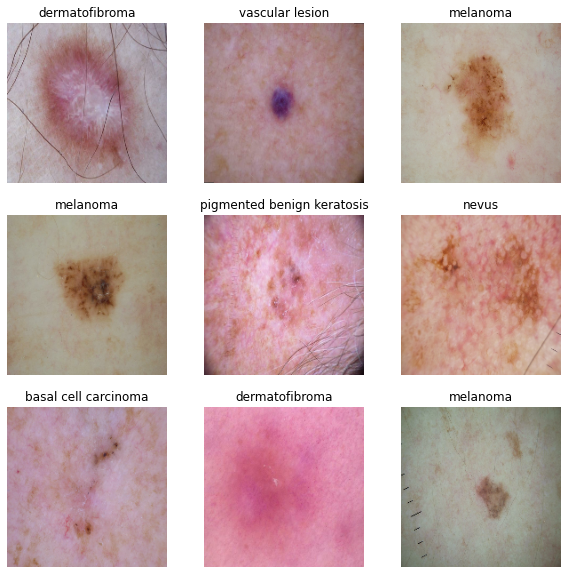

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


    

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [89]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Step 4 - Create the model
- Created a CNN model to detect 9 classes
- Defined with appropriate optimiser and loss function for model training
- Train the model with 20 epoch

In [90]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [91]:

model=Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(9,activation='softmax')
              ])

#### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [92]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
# View the summary of all layers
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 45, 45, 64)       

#### Train the model

In [94]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 19s 26ms/step - loss: 1.7177 - accuracy: 0.3520 - val_loss: 2.2124 - val_accuracy: 0.2609
Epoch 2/20
169/169 [==============================] - 3s 20ms/step - loss: 1.3499 - accuracy: 0.5061 - val_loss: 2.3646 - val_accuracy: 0.2609
Epoch 3/20
169/169 [==============================] - 3s 20ms/step - loss: 1.1411 - accuracy: 0.5797 - val_loss: 3.7449 - val_accuracy: 0.2609
Epoch 4/20
169/169 [==============================] - 3s 20ms/step - loss: 0.9505 - accuracy: 0.6576 - val_loss: 3.8455 - val_accuracy: 0.3478
Epoch 5/20
169/169 [==============================] - 3s 20ms/step - loss: 0.7741 - accuracy: 0.7255 - val_loss: 3.7365 - val_accuracy: 0.2609
Epoch 6/20
169/169 [==============================] - 3s 20ms/step - loss: 0.6819 - accuracy: 0.7656 - val_loss: 5.1138 - val_accuracy: 0.1739
Epoch 7/20
169/169 [==============================] - 3s 20ms/step - loss: 0.5070 - accuracy: 0.8257 - val_loss: 4.6762 - val_accuracy: 0.1739
Epoch 8/2

#### Visualizing training results

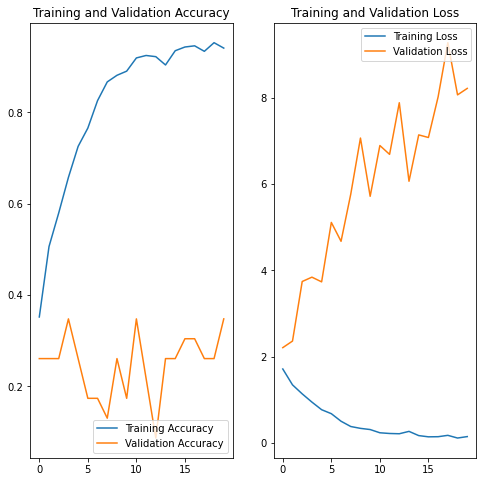

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings 

- The validation accuracy is very low compared with Training accuracy
- The validation loss is high compared with validation loss

This graph shows that we can improve this model.  Rason could be the class imbalance.

#### Printing the Accuracy and Loss values

In [96]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here


loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy)
print("Validation Accuracy : ",accuracy_v)
print("Loss                : ",loss)
print("Validation Loss     : ", loss_v)


# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

1/1 [==============================] - 0s 23ms/step - loss: 8.2200 - accuracy: 0.3478
Accuracy            :  0.9413946866989136
Validation Accuracy :  0.3478260934352875
Loss                :  0.16874714195728302
Validation Loss     :  8.219955444335938


#### Step 5 - Data augmentation strategy is applied

In [97]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

aug_layer=keras.Sequential([
                  layers.experimental.preprocessing.RandomFlip(mode='horizontal',input_shape=(img_height,img_width,3)),
                  layers.experimental.preprocessing.RandomRotation(0.25)
])

#### Step 6 - Model building and training 

In [98]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model=Sequential([
                  aug_layer,
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.Dropout(0.3),
                  layers.MaxPool2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.Dropout(0.3),
                  layers.MaxPool2D(),
                  layers.Flatten(),
                  layers.Dropout(0.5),
                  layers.Dense(128,activation='relu'),
                  layers.Dropout(0.5),
                  layers.Dense(9,activation='softmax')
              ])


Compile the model

In [99]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

Using 20 epochs

In [100]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 5s 26ms/step - loss: 2.1826 - accuracy: 0.1662 - val_loss: 2.1878 - val_accuracy: 0.2174
Epoch 2/20
169/169 [==============================] - 4s 25ms/step - loss: 2.0363 - accuracy: 0.2201 - val_loss: 2.0240 - val_accuracy: 0.3043
Epoch 3/20
169/169 [==============================] - 4s 25ms/step - loss: 1.6728 - accuracy: 0.3637 - val_loss: 1.8570 - val_accuracy: 0.2174
Epoch 4/20
169/169 [==============================] - 4s 25ms/step - loss: 1.5753 - accuracy: 0.3932 - val_loss: 1.8387 - val_accuracy: 0.2609
Epoch 5/20
169/169 [==============================] - 4s 25ms/step - loss: 1.5492 - accuracy: 0.4065 - val_loss: 1.7231 - val_accuracy: 0.3478
Epoch 6/20
169/169 [==============================] - 4s 25ms/step - loss: 1.4936 - accuracy: 0.4260 - val_loss: 1.7125 - val_accuracy: 0.3478
Epoch 7/20
169/169 [==============================] - 4s 25ms/step - loss: 1.4679 - accuracy: 0.4286 - val_loss: 1.6999 - val_accuracy: 0.3043

In [101]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 32)        0         
                                                      

### Visualizing the results

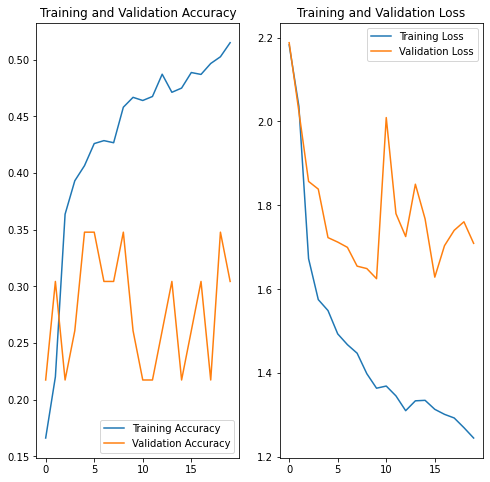

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [103]:

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy)
print("Validation Accuracy : ", accuracy_v)
print("Loss                : ", loss)
print("Validation Loss     : ", loss_v)


1/1 [==============================] - 0s 20ms/step - loss: 1.7095 - accuracy: 0.3043
Accuracy            :  0.5723294019699097
Validation Accuracy :  0.30434781312942505
Loss                :  1.2167280912399292
Validation Loss     :  1.709485650062561


#### Step 7 Class distribution 
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [104]:
## Your code goes here.
from glob import glob
import os 
path_list=[x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
cancer_type_list=[os.path.basename(os.path.dirname(i)) for i in glob(os.path.join(data_dir_train, '*', '*.jpg'))]


In [105]:
original_df=pd.DataFrame(list(dict(zip(path_list,cancer_type_list)).items()),columns=['path','cancer_type'])

In [106]:
original_df['cancer_type'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: cancer_type, dtype: int64

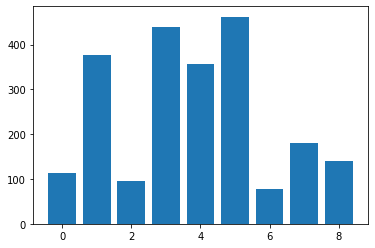

In [107]:
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
x,y=original_df['path'],original_df['cancer_type']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
The following two types have less number of samples
- dermatofibroma                 95
- seborrheic keratosis           77

#### - Which classes dominate the data in terms proportionate number of samples?
The following two types have lot of samples which will dominate the model
pigmented benign keratosis    462
melanoma                      438

#### Step 8 Handling class imbalance
#### **Augmentor:** We use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [108]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [109]:
path_to_training_dataset=data_dir_train
##comehere

import Augmentor
for i in class_names:
    #print(str(path_to_training_dataset) +"/" +  i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/"+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.



In [110]:

print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [111]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [112]:

from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030142.jpg_3cf36b0e-0735-4d81-8fec-1f872fc86742.jpg',
 '/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_50ecb98a-22b3-4a32-9143-9f577bb72b70.jpg',
 '/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029781.jpg_8c7dce20-19bc-47a8-8887-3091ecf92166.jpg',
 '/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027447.jpg_09990807-8c39-4179-93f0-9df7691a0507.jpg',
 '/content/drive/MyDrive/UpGrad/cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis

In [113]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [114]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [115]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['path','cancer_type']) 
new_df = original_df.append(df2)

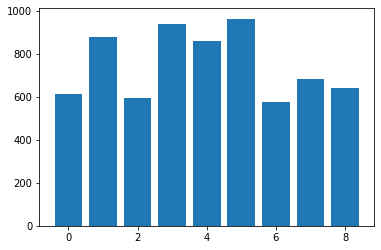

In [116]:
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
x,y=new_df['path'],new_df['cancer_type']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.


#### Step 9 - Train the model on the data created using Augmentor

In [117]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [118]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [119]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [120]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [121]:
## your code goes here

model=Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Flatten(),
                  layers.Dropout(0.2),
                  layers.Dense(128,activation='relu'),
                  layers.Dropout(0.3),
                  layers.BatchNormalization(),
                  layers.Dense(9,activation='softmax')
              ])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [122]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [123]:
# Train the Model
epochs = 20
## Your code goes here, use 20 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 25s 44ms/step - loss: 1.8260 - accuracy: 0.3136 - val_loss: 1.6972 - val_accuracy: 0.3578
Epoch 2/20
169/169 [==============================] - 4s 23ms/step - loss: 1.4999 - accuracy: 0.4429 - val_loss: 1.4278 - val_accuracy: 0.4900
Epoch 3/20
169/169 [==============================] - 4s 23ms/step - loss: 1.3670 - accuracy: 0.4900 - val_loss: 1.2979 - val_accuracy: 0.5323
Epoch 4/20
169/169 [==============================] - 4s 23ms/step - loss: 1.2546 - accuracy: 0.5326 - val_loss: 1.4264 - val_accuracy: 0.4625
Epoch 5/20
169/169 [==============================] - 4s 23ms/step - loss: 1.1558 - accuracy: 0.5692 - val_loss: 1.1329 - val_accuracy: 0.6013
Epoch 6/20
169/169 [==============================] - 4s 23ms/step - loss: 1.0281 - accuracy: 0.6228 - val_loss: 1.1668 - val_accuracy: 0.5672
Epoch 7/20
169/169 [==============================] - 4s 23ms/step - loss: 0.8828 - accuracy: 0.6827 - val_loss: 0.8813 - val_accuracy: 0.706

#### **Todo:**  Visualize the model results

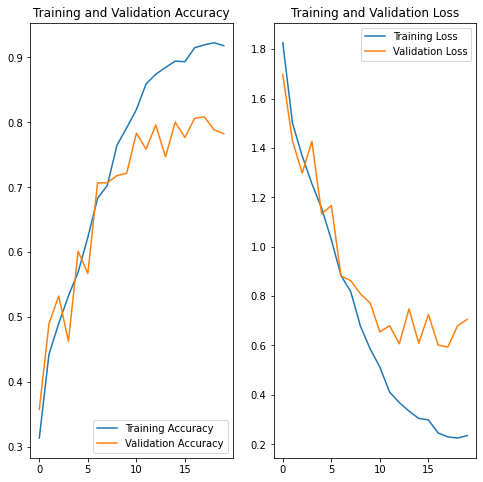

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [125]:
print("-----------------------   Accuracy  ----------------------- ")

loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy            : ", accuracy)
print("Validation Accuracy : ",accuracy_v)
print("Loss                : ",loss)
print("Validation Loss     : ", loss_v)

-----------------------   Accuracy  ----------------------- 
43/43 [==============================] - 0s 10ms/step - loss: 0.7059 - accuracy: 0.7825
Accuracy            :  0.9159866571426392
Validation Accuracy :  0.7824795842170715
Loss                :  0.24027857184410095
Validation Loss     :  0.7059159874916077


Summary:

The following is what I have done on various models and the observation
1. model 1 - the initial model had validation accuracy low compared with Training accuracy and the validation loss is high compared with validation loss

2. model 2 - Data augmentation strategy is applied.  The accuracy and loss improved

3. model 3 - Class imbalance is rectified by adding more train data using Augmentor, batch normalization.  This 3rd model provided better results compared with previous two other models


End of report